In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [14]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
labels = pd.Categorical.from_codes(iris.target, iris.target_names)

In [16]:
#Ml Model
def GenerateDTreeFrom_nD_Data(Data, Labels, Metric="gini"):
    dtree = DecisionTreeClassifier(criterion=Metric)
    dtree.fit(Data, Labels)
    return dtree
    
#new instance of my Decision Tree
gdtree = GenerateDTreeFrom_nD_Data(data, labels, Metric="gini")

# get the importance of variables of my dataset
importance = gdtree.feature_importances_

importance_df = pd.DataFrame({'Variable': data.columns, 'Importance': importance})

importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
importance_df

,Variable,Importance
0,petal width (cm),0.922611
1,petal length (cm),0.064056
2,sepal width (cm),0.013333
3,sepal length (cm),0.000000


<Axes: xlabel='labels', ylabel='petal width (cm)'>

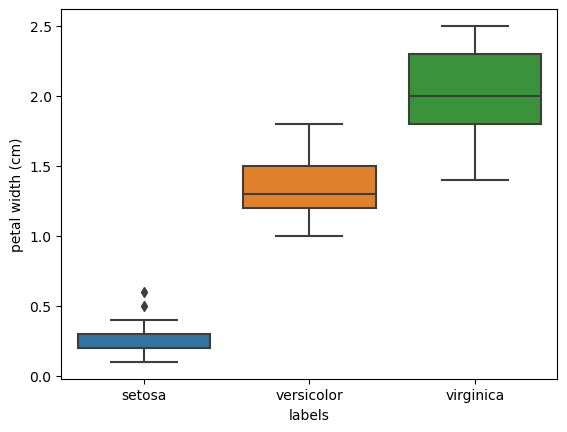

In [18]:
data['labels'] = labels
sns.boxplot(data = data, x='labels' , y='petal width (cm)')

In [77]:
outliers = data[(data['labels'] == 'setosa') & (data['petal width (cm)'] > 0.4) & (data['petal width (cm)'] < 1.0)]
outliers

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
23,5.1,3.3,1.7,0.5,setosa
43,5.0,3.5,1.6,0.6,setosa


In [27]:
outliers_idx = set()
for column in data.columns[:-1]:  # Alle Spalte außer die Letzte , also außer die labels Spalte
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lw_bound = Q1 - 1.5 * IQR
    up_bound = Q1 + 1.5 * IQR
    outliers = data[(data[column]< lw_bound) | (data[column]> up_bound)].index
    outliers_idx.update(outliers)
    
outliers = data.loc[outliers_idx]
print('Die Ausreißer sind: ', outliers)
#outliers = data[((data['labels'] == 'setosa') & (data['petal width (cm)']< lw_bound)) | ((data['labels'] == 'setosa') & (data['petal width (cm)']> up_bound))]


Die Ausreißer sind:       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
129                7.2               3.0                5.8               1.6   
130                7.4               2.8                6.1               1.9   
131                7.9               3.8                6.4               2.0   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
135                7.7               3.0                6.1               2.3   
10                 5.4               3.7                1.5               0.2   
14                 5.8               4.0                1.2               0.2   
15                 5.7               4.4                1.5               0.4   
16                 5.4               3.9                1.3               0.4   
18                 5.7               3.8                1.7               0.3   
19     

C:\Users\#\AppData\Local\Temp\ipykernel_9124\2652756962.py:12: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  outliers = data.loc[outliers_idx]


In [29]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

X = iris.data
y = iris.target

# finde die Ausreßer mit LocalOutlierFactor
lof = LocalOutlierFactor()
outliers_pred = lof.fit_predict(X)

# Die Ausreißer werden eine Wert -1 haben
outliers = X[outliers_pred == -1]
outliers_indices = np.where(outliers_pred == -1)[0]

# erstelle eine DataFrame für outliers
outliers_df = pd.DataFrame(outliers, columns=iris.feature_names)
outliers_df['target'] = y[outliers_indices]

print(outliers_df)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.7               4.4                1.5               0.4   
1                4.5               2.3                1.3               0.3   
2                5.1               2.5                3.0               1.1   
3                7.7               3.8                6.7               2.2   
4                7.7               2.6                6.9               2.3   
5                7.9               3.8                6.4               2.0   

   target  
0       0  
1       0  
2       1  
3       2  
4       2  
5       2  
